# Models Project 1

## Task 1 - Logistic Regression

### Importing Libraries

In [74]:
# Libraries

import os
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

### Importing Datasets

In [2]:
path = 'kdd_training.csv'
kdd_train = pd.read_csv(path)

In [3]:
print('Training Class =',type(kdd_train))
print('Training Shape =',kdd_train.shape)
print('Column Names =',list(kdd_train.columns))

Training Class = <class 'pandas.core.frame.DataFrame'>
Training Shape = (7221, 44)
Column Names = ['TARGET_B', 'TARGET_D', 'GiftCnt36', 'GiftCntAll', 'GiftCntCard36', 'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36', 'GiftAvgAll', 'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12', 'PromCnt36', 'PromCntAll', 'PromCntCard12', 'PromCntCard36', 'PromCntCardAll', 'StatusCat96NK', 'StatusCatStarAll', 'DemCluster', 'DemAge', 'DemGender', 'DemHomeOwner', 'DemMedHomeValue', 'DemPctVeterans', 'DemMedIncome', 'GiftCntAll_M', 'GiftCntCardAll_M', 'GiftAvgCard36_M', 'PromCntCard12_M', 'DemAge_M', 'DemMedHomeValue_M', 'DemPctVeterans_M', 'DemMedIncome_M', 'StatusCat96NK_A', 'StatusCat96NK_E', 'StatusCat96NK_F', 'StatusCat96NK_L', 'StatusCat96NK_m', 'DemHomeOwner_H', 'DemGender_F', 'DemGender_U', '_ROLE_']


In [4]:
kdd_train.head()

,TARGET_B,TARGET_D,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,DemMedIncome_M,StatusCat96NK_A,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_m,DemHomeOwner_H,DemGender_F,DemGender_U,_ROLE_
0,0,NaN,1.098612,1.386294,1,1.386294,17.0,13.5,9.25,17.000000,...,1,1,0,0,0,0,0,1,0,Train
1,0,NaN,0.693147,2.079442,0,1.386294,20.0,20.0,15.88,13.972979,...,0,1,0,0,0,0,0,1,0,Train
2,1,40.0,0.693147,1.098612,0,0.693147,35.0,35.0,28.33,13.972979,...,0,1,0,0,0,0,0,1,0,Train
3,1,50.0,1.098612,0.693147,1,0.693147,20.0,12.5,12.50,5.000000,...,1,1,0,0,0,0,1,1,0,Train
4,0,NaN,1.609438,1.609438,1,0.693147,10.0,41.5,35.20,50.000000,...,0,1,0,0,0,0,0,1,0,Train


In [5]:
path = 'kdd_validation.csv'
kdd_validate = pd.read_csv(path)

In [6]:
print('Validation Class =',type(kdd_validate))
print('Validation Shape =',kdd_validate.shape)
print('Column Names =',list(kdd_validate.columns))

Validation Class = <class 'pandas.core.frame.DataFrame'>
Validation Shape = (2465, 44)
Column Names = ['TARGET_B', 'TARGET_D', 'GiftCnt36', 'GiftCntAll', 'GiftCntCard36', 'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36', 'GiftAvgAll', 'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12', 'PromCnt36', 'PromCntAll', 'PromCntCard12', 'PromCntCard36', 'PromCntCardAll', 'StatusCat96NK', 'StatusCatStarAll', 'DemCluster', 'DemAge', 'DemGender', 'DemHomeOwner', 'DemMedHomeValue', 'DemPctVeterans', 'DemMedIncome', 'GiftCntAll_M', 'GiftCntCardAll_M', 'GiftAvgCard36_M', 'PromCntCard12_M', 'DemAge_M', 'DemMedHomeValue_M', 'DemPctVeterans_M', 'DemMedIncome_M', 'StatusCat96NK_A', 'StatusCat96NK_E', 'StatusCat96NK_F', 'StatusCat96NK_L', 'StatusCat96NK_m', 'DemHomeOwner_H', 'DemGender_F', 'DemGender_U', '_ROLE_']


In [7]:
kdd_validate.head()

,TARGET_B,TARGET_D,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,DemMedIncome_M,StatusCat96NK_A,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_m,DemHomeOwner_H,DemGender_F,DemGender_U,_ROLE_
0,1,15.0,1.098612,0.693147,1,0.693147,15.0,10.00,10.00,5.0,...,0,1,0,0,0,0,1,1,0,Validate
1,0,NaN,1.098612,1.098612,1,0.693147,20.0,16.00,14.00,20.0,...,0,1,0,0,0,0,0,1,0,Validate
2,1,10.0,1.609438,2.639057,2,2.079442,10.0,8.50,6.93,9.5,...,0,1,0,0,0,0,1,1,0,Validate
3,0,NaN,1.386294,1.098612,2,1.098612,15.0,10.33,10.33,8.0,...,0,1,0,0,0,0,1,1,0,Validate
4,0,NaN,0.693147,1.609438,1,1.098612,15.0,15.00,12.00,15.0,...,0,1,0,0,0,0,1,1,0,Validate


### Dropping Unused Columns

In [98]:
kdd_train_X = kdd_train.iloc[:,[2,5,9,10,11,12,15,17,19,24,26,29,31,32,36,37]]
# 2,5,9,10,11,12,15,17,19,24,26,29,31,32,36,37
kdd_train_y = kdd_train.iloc[:,0]
kdd_train_X.head()

,GiftCnt36,GiftCntCardAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCntCard12,PromCntCardAll,StatusCatStarAll,DemMedHomeValue,DemMedIncome,GiftAvgCard36_M,DemAge_M,DemMedHomeValue_M,StatusCat96NK_E,StatusCat96NK_F
0,1.098612,1.386294,17.000000,21,4.189655,8,3.0,2.564949,0,4.716481,31.777503,0,1,1,0,0
1,0.693147,1.386294,13.972979,26,4.521789,14,5.0,3.178054,0,5.225747,85.000000,1,0,0,0,0
2,0.693147,0.693147,13.972979,17,3.784190,15,6.0,3.091042,0,4.919981,32.000000,1,1,0,0,0
3,1.098612,0.693147,5.000000,18,3.295837,11,5.0,2.197225,0,4.716481,31.777503,0,0,1,0,0
4,1.609438,0.693147,50.000000,18,3.496508,14,6.0,2.564949,0,4.248495,37.000000,0,1,0,0,0


In [76]:
kdd_train_X.shape

(7221, 8)

In [99]:
kdd_train_X = kdd_train_X.to_numpy()
kdd_train_y = kdd_train_y.to_numpy()

In [100]:
kdd_validate_X = kdd_validate.iloc[:,[2,5,9,10,11,12,15,17,19,24,26,29,31,32,36,37]]
kdd_validate_y = kdd_validate.iloc[:,0]
kdd_validate_X.head()

,GiftCnt36,GiftCntCardAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCntCard12,PromCntCardAll,StatusCatStarAll,DemMedHomeValue,DemMedIncome,GiftAvgCard36_M,DemAge_M,DemMedHomeValue_M,StatusCat96NK_E,StatusCat96NK_F
0,1.098612,0.693147,5.0,18,3.367296,10,4,2.079442,0,3.806662,31.0,0,0,0,0,0
1,1.098612,0.693147,20.0,24,3.784190,11,6,2.564949,0,4.219508,40.0,0,0,0,0,0
2,1.609438,2.079442,9.5,23,4.844187,12,6,3.367296,0,5.003946,40.0,0,0,0,0,0
3,1.386294,1.098612,8.0,18,3.465736,12,6,2.397895,0,4.189655,20.0,0,0,0,0,0
4,0.693147,1.098612,15.0,21,4.158883,10,4,2.708050,0,4.330733,28.0,0,0,0,0,0


### Building Model 1 - Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [80]:
logisticRegr = LogisticRegression(max_iter=10000)

In [101]:
logisticRegr.fit(kdd_train_X,kdd_train_y)

LogisticRegression(max_iter=10000)

In [102]:
predictions = logisticRegr.predict(kdd_validate_X)

### Analysis of Model 1

In [103]:
cm = metrics.confusion_matrix(kdd_validate_y,predictions)

In [104]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+TN+FN+FP)
recall = TP/(TP+FN)

In [105]:
print('Model 1 Accuracy: {0:0.2f}'.format(accuracy))
print('Model 1 Precision: {0:0.2f}'.format(precision))
print('Model 1 Recall: {0:0.2f}'.format(recall))

Model 1 Accuracy: 0.57
Model 1 Precision: 0.56
Model 1 Recall: 0.59


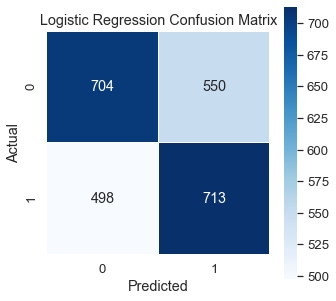

In [108]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
sns.set(font_scale=1.2)

### Building Model 2 - Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [113]:
rf = RandomForestRegressor(n_estimators=1000,random_state = 42)
rf.fit(kdd_train_X,kdd_train_y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [114]:
predictions2 = rf.predict(kdd_validate_X)

### Analysis of Model 2

In [115]:
for i in range(2465):
    if predictions2[i] < 0.5:
        predictions2[i] = 0
    else:
        predictions2[i] = 1

In [116]:
cm2 = metrics.confusion_matrix(kdd_validate_y,predictions2)

In [117]:
TP2 = cm2[1,1]
FP2 = cm2[0,1]
FN2 = cm2[1,0]
TN2 = cm2[0,0]
precision2 = TP2/(TP2+FP2)
accuracy2 = (TP2+TN2)/(TP2+TN2+FN2+FP2)
recall2 = TP2/(TP2+FN2)

In [118]:
print('Model 2 Accuracy: {0:0.2f}'.format(accuracy2))
print('Model 2 Precision: {0:0.2f}'.format(precision2))
print('Model 2 Recall: {0:0.2f}'.format(recall2))

Model 2 Accuracy: 0.55
Model 2 Precision: 0.54
Model 2 Recall: 0.55


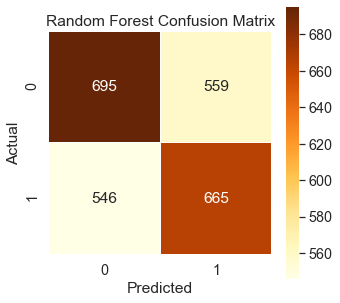

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(cm2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlOrBr')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
sns.set(font_scale=1.2)

### Building Model 3 - Neural Network

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()

In [34]:
NN_train_X = kdd_train_X
NN_validate_X = kdd_validate_X
scaler.fit(NN_train_X)

StandardScaler()

In [35]:
NN_train_X = scaler.transform(NN_train_X)
NN_validate_X = scaler.transform(NN_validate_X)

In [122]:
?MLPClassifier

In [129]:
mlp = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=1000,random_state=42)

In [130]:
mlp.fit(NN_train_X,kdd_train_y)

MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=1000, random_state=42)

In [131]:
predictions3 = mlp.predict(NN_validate_X)

### Analysis of Model 3

In [132]:
cm3 = metrics.confusion_matrix(kdd_validate_y,predictions3)

In [133]:
TP3 = cm3[1,1]
FP3 = cm3[0,1]
FN3 = cm3[1,0]
TN3 = cm3[0,0]
precision3 = TP3/(TP3+FP3)
accuracy3 = (TP3+TN3)/(TP3+TN3+FN3+FP3)
recall3 = TP3/(TP3+FN3)

In [134]:
print('Model 3 Accuracy: {0:0.2f}'.format(accuracy3))
print('Model 3 Precision: {0:0.2f}'.format(precision3))
print('Model 3 Recall: {0:0.2f}'.format(recall3))

Model 3 Accuracy: 0.56
Model 3 Precision: 0.56
Model 3 Recall: 0.53


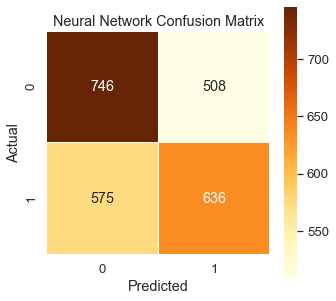

In [135]:
plt.figure(figsize=(5,5))
sns.heatmap(cm3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlOrBr')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Neural Network Confusion Matrix')
sns.set(font_scale=1.2)

In [121]:
task1_dat = {'Model':['Logistic Regression','Random Forest','Neural Network'],
             'Accuracy':[accuracy,accuracy2,accuracy3],
             'Precision':[precision,precision2,precision3],
             'Recall':[recall,recall2,recall3]}

task1_df = pd.DataFrame(task1_dat,columns=['Model','Accuracy','Precision','Recall'])

task1_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.574848,0.564529,0.588770
1,Random Forest,0.551724,0.543301,0.549133
2,Neural Network,0.560649,0.555944,0.525186


## Task 2 - Linear Regression

### Importing Data Set

In [49]:
path = 'kdd_linear_test.csv'
kdd_linear = pd.read_csv(path)

In [50]:
print('Training Class =',type(kdd_linear))
print('Training Shape =',kdd_linear.shape)
print('Column Names =',list(kdd_linear.columns))

Training Class = <class 'pandas.core.frame.DataFrame'>
Training Shape = (4843, 42)
Column Names = ['TARGET_B', 'TARGET_D', 'GiftCnt36', 'GiftCntAll', 'GiftCntCard36', 'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36', 'GiftAvgAll', 'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12', 'PromCnt36', 'PromCntAll', 'PromCntCard12', 'PromCntCard36', 'PromCntCardAll', 'StatusCat96NK', 'StatusCatStarAll', 'DemAge', 'DemGender', 'DemHomeOwner', 'DemMedHomeValue', 'DemPctVeterans', 'DemMedIncome', 'GiftCntAll_M', 'GiftCntCardAll_M', 'GiftAvgCard36_M', 'PromCntCard12_M', 'DemAge_M', 'DemMedHomeValue_M', 'DemPctVeterans_M', 'DemMedIncome_M', 'StatusCat96NK_A', 'StatusCat96NK_E', 'StatusCat96NK_F', 'StatusCat96NK_L', 'StatusCat96NK_m', 'DemHomeOwner_H', 'DemGender_F', 'DemGender_U']


### Dropping Unused Columns

In [51]:
kdd_linear_X = kdd_linear.iloc[:,[6,7,8,14,17,24,25,26,27,33,36,38,39,40]]
kdd_linear_y = kdd_linear.iloc[:,1]
kdd_linear_X.head()

,GiftAvgLast,GiftAvg36,GiftAvgAll,PromCntAll,PromCntCardAll,DemPctVeterans,DemMedIncome,GiftCntAll_M,GiftCntCardAll_M,DemMedIncome_M,StatusCat96NK_F,StatusCat96NK_m,DemHomeOwner_H,DemGender_F
0,35.0,35.0,28.33,4.025352,3.091042,300.000000,32.000000,0,0,0,0,0,0,1
1,20.0,12.5,12.50,2.944439,2.197225,445.434692,31.777503,0,0,1,0,0,1,1
2,17.0,17.0,11.43,4.060443,3.367296,500.000000,44.000000,0,0,0,0,0,0,1
3,5.0,4.8,4.29,3.465736,2.564949,0.000000,37.000000,0,0,0,0,0,0,1
4,12.0,11.0,6.08,4.234107,3.332205,900.000000,35.000000,0,0,0,0,0,1,1


## Model 1 - Linear Regression

In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

In [2]:
?cross_val_score

In [53]:
linregr = linear_model.LinearRegression()

In [54]:
scores = cross_val_score(linregr,kdd_linear_X,kdd_linear_y,cv=5, scoring="neg_root_mean_squared_error")

In [55]:
print('Model 1 RMSE: {0:0.2f}'.format(np.mean(scores)*-1))

Model 1 RMSE: 8.53


## Model 2 - Neural Network

In [56]:
mlp2 = MLPRegressor(hidden_layer_sizes=(11,11,11),max_iter=1000,random_state=42)

In [57]:
scores2 = cross_val_score(mlp2,kdd_linear_X,kdd_linear_y,cv=5, scoring="neg_root_mean_squared_error")

In [58]:
print('Model 2 RMSE: {0:0.2f}'.format(np.mean(scores2)*-1))

Model 2 RMSE: 8.60


## Model 3 - SVR

In [59]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
svmregr = make_pipeline(StandardScaler(), SVR(kernel='linear', C=100, gamma='auto'))

In [142]:
scores3 = cross_val_score(svmregr,kdd_linear_X,kdd_linear_y,cv=5, scoring="neg_root_mean_squared_error")

In [143]:
print('Model 3 RMSE: {0:0.2f}'.format(np.mean(scores3)*-1))

Model 3 RMSE: 8.61


In [139]:
scores3=np.mean(scores3)*-1

In [140]:
scores3

8.607905983112742

In [144]:
task2_dat = {'Model':['Linear Regression','SVR','Neural Network'],
             'RMSE':[np.mean(scores)*-1,np.mean(scores2)*-1,np.mean(scores3)*-1]}

task2_df = pd.DataFrame(task2_dat,columns=['Model','RMSE'])

task2_df

,Model,RMSE
0,Linear Regression,8.527106
1,SVR,8.602483
2,Neural Network,8.607906
